In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X,y = mnist.data,mnist.target

In [5]:
some_digit = X[55]

In [6]:
some_digit_image = some_digit.reshape(28,28)

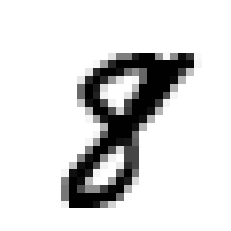

In [7]:
plt.imshow(some_digit_image,cmap='binary')
plt.axis("off")
plt.show()

In [8]:
type(y[50])

str

In [9]:
import numpy as np
y = y.astype(np.uint8)

In [10]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

#### Binary Classifer

In [11]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array([False])

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [16]:
skfolds = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)

In [17]:
for train_index,test_index in skfolds.split(X_train, y_train_3):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_3[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_3[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

0.9505
0.9649
0.9687


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring='accuracy')

array([0.9496 , 0.9624 , 0.96275])

In [20]:
from sklearn.base import BaseEstimator

In [21]:
class Never3Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)

In [22]:
never_3_clf = Never3Classifier()
cross_val_score(never_3_clf, X_train, y_train_3, cv=3, scoring='accuracy')

array([0.8962 , 0.89975, 0.8975 ])

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

AttributeError: 'QuadMesh' object has no property 'dpi'

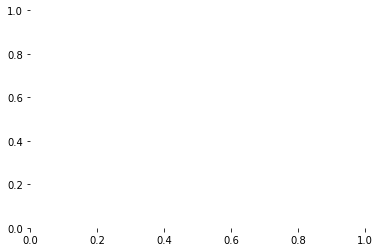

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_train_3, y_train_pred),dpi = 200,annot = True)
plt.show()

<AxesSubplot:>

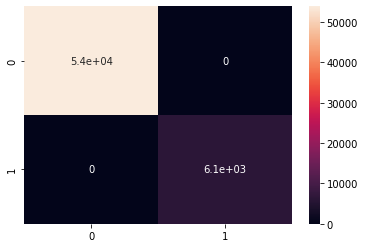

In [27]:
y_train_perfect_predictions = y_train_3
sns.heatmap(confusion_matrix(y_train_3, y_train_perfect_predictions),dpi=200,annot = True)


In [28]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_3, y_train_pred)

0.9111111111111111

In [29]:
recall_score(y_train_3, y_train_pred)

0.655358016636764

In [30]:
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.7623565126648326

In [31]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-8552.54699921])

In [32]:
thresold = 0
y_some_digit_pred = (y_scores>thresold)
y_some_digit_pred

array([False])

In [33]:
thresold = -2000
y_some_digit_pred = (y_scores>thresold)
y_some_digit_pred

array([False])

In [34]:
y_scores =cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method='decision_function')

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
precisions,recalls,thresholds = precision_recall_curve(y_train_3, y_scores)

In [37]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label = 'Precision')
    plt.plot(thresholds,recalls[:-1],"g-",label='Recall')

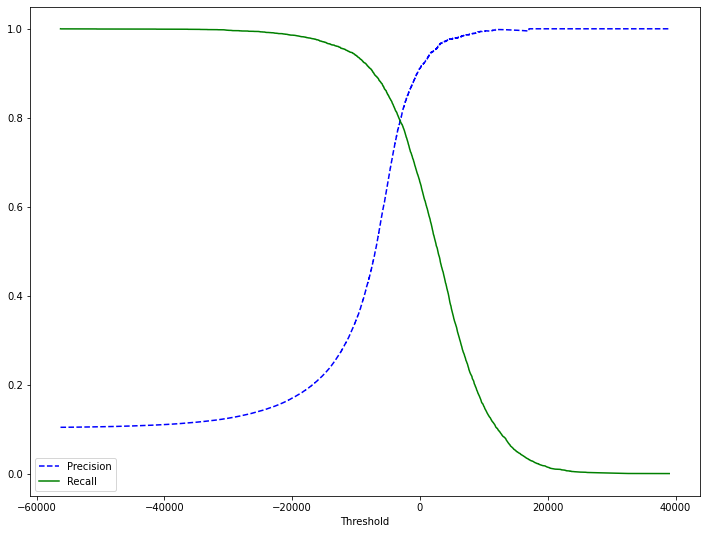

In [38]:
plt.figure(figsize=(12,9))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlabel('Threshold')
plt.legend()

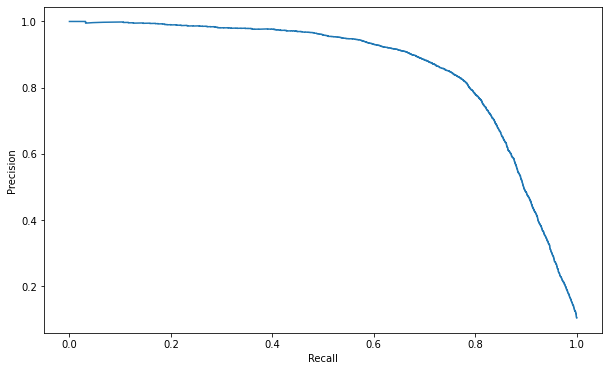

In [39]:
plt.figure(figsize=(10,6))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recalls,precisions)
plt.show()

In [40]:
threshold_90_precision = thresholds[np.argmax(precisions>=.90)]
threshold_90_precision

-411.44326592496236

In [41]:
y_train_pred_90 = (y_scores>=threshold_90_precision)

In [42]:
precision_score(y_train_3, y_train_pred_90)

0.9000870700914236

In [43]:
recall_score(y_train_3, y_train_pred_90)

0.6744413635622247

In [44]:
from sklearn.metrics import roc_curve

In [45]:
fpr,tpr,thresholds = roc_curve(y_train_3, y_scores)

In [46]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')

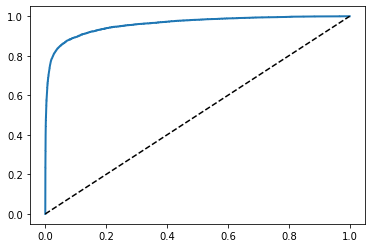

In [47]:
plot_roc_curve(fpr,tpr)
plt.show()

In [48]:
from sklearn.metrics import  roc_auc_score
roc_auc_score(y_train_3, y_scores)

0.9599243001892759

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3, method ='predict_proba')

In [51]:
y_scores_forest = y_probas_forest[:,1]

In [52]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_3, y_scores_forest)

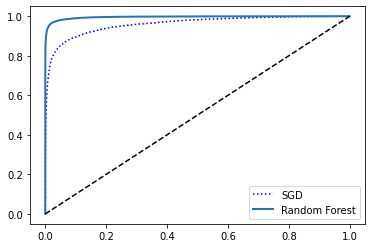

In [53]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend()
plt.show()

In [54]:
roc_auc_score(y_train_3, y_scores_forest)

0.995864544068936

In [55]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [ ]:
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
svm_clf.classes_

In [ ]:
# sgd_clf.fit(X_train,y_train)

In [ ]:
# sgd_clf.predict([some_digit])

In [ ]:
# sgd_clf.decision_function([some_digit])

In [ ]:
# cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

In [68]:
# from sklearn.preprocessing import  StandardScaler

In [ ]:
# scaler = StandardScaler()
# X_train_scale = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf,X_train_scale,y_train,cv=3,scoring='accuracy')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train_large = (y_train>=7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred=  cross_val_predict(knn_clf,X_train,y_multilabel,cv= 3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')